In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('stroke_data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [5]:
df.drop('id',inplace=True,axis=1)

In [6]:
label_en = LabelEncoder()
for i in df.columns:
    df[i] = label_en.fit_transform(df[i])

In [6]:
target = df[['stroke']]
inputs = df.drop('stroke',axis=1)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,train_size=0.9)

## Logistic regression

In [8]:
x_train.shape

(4599, 10)

<ipython-input-9-54e47cbde994>:15: RuntimeWarning: divide by zero encountered in log
  loss = y_train*np.log(prediction) + (1-y_train)*np.log((1-prediction))


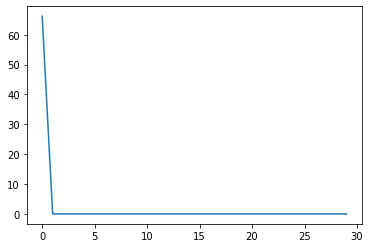

In [9]:

x = np.random.random((10,1))

lr = 0.000001

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost(y,prediction):
    return np.sqrt(np.sum((y_train - prediction)**2))

costs = []
for i in range(30):
    z = np.dot(x_train,x)
    prediction = sigmoid(z)
    loss = y_train*np.log(prediction) + (1-y_train)*np.log((1-prediction))
    c = cost(y_train,prediction)
    costs.append(c)
    gradient = np.dot(x_train.T,loss)/x_train.shape[0]
    x = x - lr * gradient + x**2
    
plt.plot(range(30),costs)

In [10]:
s = 0
for i in range(x_test.shape[0]):
    z = np.dot([x_test.iloc[i]],x)
    prediction = sigmoid(z)
    c = cost(y_train,prediction)
    if prediction == y_test.iloc[i][0]:
        s+=1
print((s/x_test.shape[0])*100)
    

100.0


In [17]:
np.dot(x_test,x)

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [16]:
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [15]:
y_test.iloc[0]

stroke    0
Name: 2389, dtype: int64

## Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4488
           1       0.48      0.95      0.63       111

    accuracy                           0.97      4599
   macro avg       0.74      0.96      0.81      4599
weighted avg       0.99      0.97      0.98      4599

0.9734724940204392


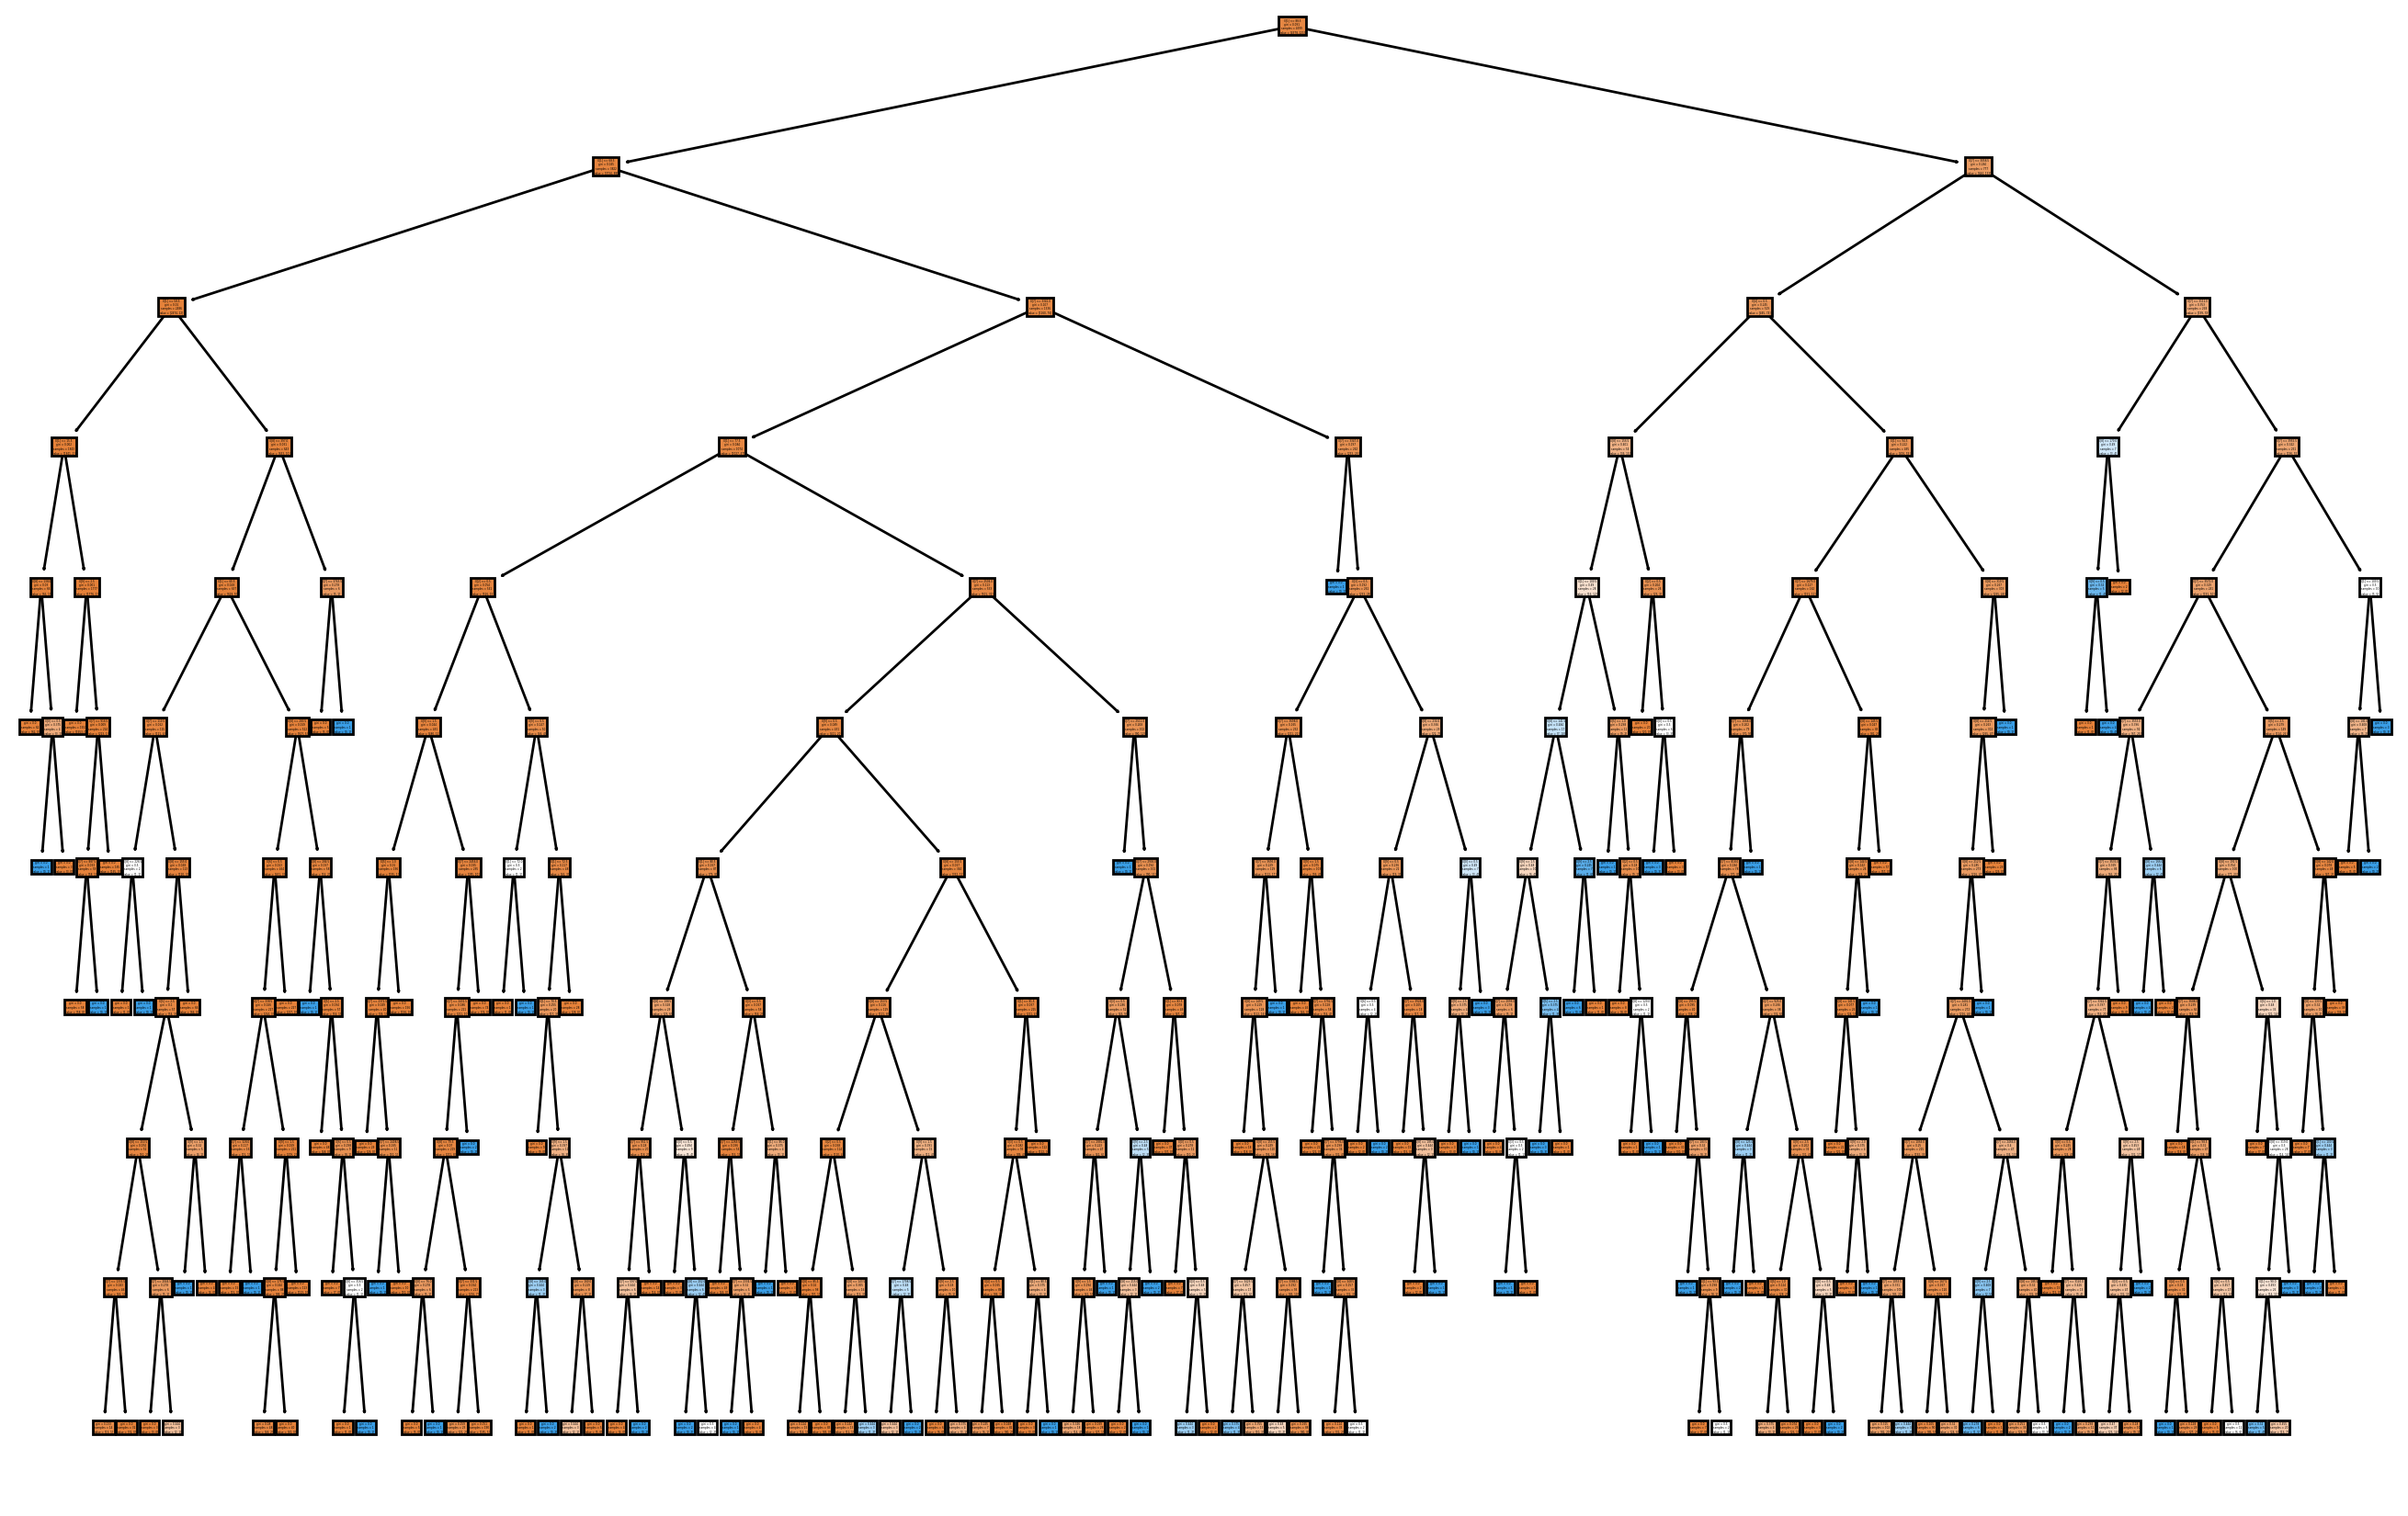

In [11]:
tree = DecisionTreeClassifier(max_depth=10)

tree.fit(x_train,y_train)
prediction = tree.predict(x_train)
print(classification_report(prediction,y_train))

print(accuracy_score(y_train,prediction))

plt.figure(dpi=200)
_ = plot_tree(tree,filled=True)

In [12]:
prediction = tree.predict(x_test)
print(classification_report(prediction,y_test))

print(accuracy_score(y_test,prediction))


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       501
           1       0.11      0.30      0.16        10

    accuracy                           0.94       511
   macro avg       0.55      0.63      0.56       511
weighted avg       0.97      0.94      0.95       511

0.9373776908023483


## Random forest

In [22]:
tree = RandomForestClassifier(n_estimators=10 ,max_depth=10)

tree.fit(x_train,y_train.values.reshape(4599,))
prediction = tree.predict(x_train)
print(classification_report(prediction,y_train))



              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4537
           1       0.28      1.00      0.44        62

    accuracy                           0.97      4599
   macro avg       0.64      0.98      0.71      4599
weighted avg       0.99      0.97      0.97      4599



In [20]:
y_train.shape

(4599, 1)

In [19]:
prediction = tree.predict(x_test)
print(classification_report(prediction,y_test))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97       509
           1       0.00      0.00      0.00         2

    accuracy                           0.94       511
   macro avg       0.50      0.47      0.48       511
weighted avg       0.99      0.94      0.97       511



# K means

In [12]:
from tqdm import tqdm
from sklearn.cluster import KMeans


In [13]:
inertia = []
for i in tqdm(range(2,20)):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:10<00:00,  1.66it/s]


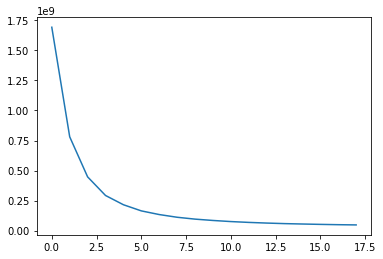

In [14]:
plt.plot(range(len(inertia)),inertia)